In [1]:
# suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
df_game = pd.read_csv("Train.csv")

## Understanding data set

In [3]:
df_game.sample(10)

Name Platform  Year_of_Release  \
1028                                  Knack      PS4           2013.0   
2203                                  Bully      PS2           2006.0   
1217                      MVP Baseball 2005      PS2           2005.0   
4152                  Unreal Tournament III     X360           2008.0   
6502                    Nightmare Creatures      N64           1996.0   
10434                        Sidewinder Max      PS2           2000.0   
14468         Samurai Shodown: Warrios Rage       PS           1999.0   
8746   Jikkyou Powerful Pro Yakyuu Portable      PSP           2006.0   
7328                               Yoostar2     X360           2011.0   
14539                        End of Nations       PC           2012.0   

            Genre                           Publisher  NA_Sales  EU_Sales  \
1028     Platform  Sony Computer Entertainment Europe      0.43      0.68   
2203       Action                Take-Two Interactive      0.75      0.03   
1217       Sports                     Electronic Arts      1.26      0.07   
4152      Shooter                        Midway Games      0.25      0.17   
6502       Action                          Activision      0.21      0.05   
10434  Simulation             Asmik Ace Entertainment      0.00      0.00   
14468    Fighting                                 SNK      0.01      0.00   
8746       Sports        Konami Digital Entertainment      0.00      0.00   
7328         Misc                             Unknown      0.11      0.09   
14539    Strategy                        Trion Worlds      0.01      0.00   

       JP_Sales  Critic_Score  Critic_Count User_Score  User_Count  \
1028       0.42          54.0          83.0        6.5      1074.0   
2203       0.04          87.0          69.0        9.1       293.0   
1217       0.00          87.0          25.0        8.6        47.0   
4152       0.01          82.0          47.0        7.6        95.0   
6502       0.00           NaN           NaN        NaN         NaN   
10434      0.09           NaN           NaN        NaN         NaN   
14468      0.00           NaN           NaN        NaN         NaN   
8746       0.15           NaN           NaN        NaN         NaN   
7328       0.00           NaN           NaN        NaN         NaN   
14539      0.00           NaN           NaN        NaN         NaN   

                Developer Rating  Global_Sales  
1028     SCE Japan Studio   E10+          1.73  
2203   Rockstar Vancouver      T          0.94  
1217            EA Sports      E          1.54  
4152           Epic Games      M          0.47  
6502                  NaN    NaN          0.26  
10434                 NaN    NaN          0.09  
14468                 NaN    NaN          0.01  
8746                  NaN    NaN          0.15  
7328                  NaN    NaN          0.21  
14539          Petroglyph      T          0.01

In [4]:
df_game.shape

(14576, 15)

In [5]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   object 
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


In [6]:
df_game.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '0.6', '1.4', '0.9', '1', '1.3', '0.2', '9.7'],
      dtype=object)

it can be seen above that rating has many unique values, and since rating is ordinal in nature we can convert it to float dtype

In [7]:
df_game[df_game['User_Score'] == 'tbd'].count()

Name               1964
Platform           1964
Year_of_Release    1928
Genre              1964
Publisher          1962
NA_Sales           1964
EU_Sales           1964
JP_Sales           1964
Critic_Score        890
Critic_Count        890
User_Score         1964
User_Count            0
Developer          1946
Rating             1920
Global_Sales       1964
dtype: int64

In [8]:
df_game['User_Score'].isnull().sum()

5816

In [9]:
df_game['User_Score'].replace('tbd', 0, inplace=True)

In [10]:
df_game['User_Score'].dropna(inplace=True)
df_game.reset_index(inplace=True, drop=True)

In [11]:
df_game['User_Score'] = df_game['User_Score'].astype('float')

In [12]:
df_game.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     14344.000000  14576.000000  14576.000000  14576.000000   
mean       2006.437117      0.295577      0.163957      0.085659   
std           5.955664      0.866491      0.536354      0.329646   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.100000      0.030000      0.000000   
75%        2010.000000      0.280000      0.130000      0.030000   
max        2020.000000     41.360000     28.960000     10.220000   

       Critic_Score  Critic_Count   User_Score    User_Count  Global_Sales  
count   7217.000000   7217.000000  8760.000000   6796.000000  14576.000000  
mean      69.676043     27.312041     5.549007    172.513096      0.598972  
std       13.773391     19.464196     3.255432    576.609716      1.647699  
min       13.000000      3.000000     0.000000      4.000000      0.010000  
25%       61.000000     12.000000     3.600000     11.000000      0.050000  
50%       71.000000     22.000000     7.000000     27.000000      0.220000  
75%       80.000000     38.000000     8.000000     89.000000      0.550000  
max       98.000000    113.000000     9.700000  10665.000000     82.530000

In [13]:
df_game.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Critic_Score  Critic_Count  User_Score  \
0     41.36     28.96      3.77          76.0          51.0         8.0   
1     29.08      3.58      6.81           NaN           NaN         NaN   
2     15.68     12.76      3.79          82.0          73.0         8.3   
3     15.61     10.93      3.28          80.0          73.0         8.0   
4     11.27      8.89     10.22           NaN           NaN         NaN   

   User_Count Developer Rating  Global_Sales  
0       322.0  Nintendo      E         82.53  
1         NaN       NaN    NaN         40.24  
2       709.0  Nintendo      E         35.52  
3       192.0  Nintendo      E         32.77  
4         NaN       NaN    NaN         31.37

In [14]:
df_game.describe(include='O')

Name Platform   Genre        Publisher  \
count                         14574    14576   14574            14527   
unique                        10327       31      12              552   
top     Need for Speed: Most Wanted      PS2  Action  Electronic Arts   
freq                             11     1935    2974             1267   

       Developer Rating  
count       8829   8704  
unique      1577      8  
top      Ubisoft      E  
freq         171   3460

In [15]:
# generating pandas profile report to get in depth analysis of our training data at one shot
report = ProfileReport(df_game)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
report.to_file('Descriptive_Analytics/descriptive_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### from above report we found that there are lot many missing data in our data and also correlation in data exist, but year_of_relaease has 0 correlation with our target variable, in that case we can opt to drop year_of_release for now, it is also found that Na_sales, Eu_sales and JP_sales are highly +vely correlaated with our traget.

In [17]:
# Dropping Year_of_release as it has no affect on our target
df_game.drop('Year_of_Release', axis=1, inplace=True)

In [18]:
df_game.head()

Name Platform         Genre Publisher  NA_Sales  \
0                Wii Sports      Wii        Sports  Nintendo     41.36   
1         Super Mario Bros.      NES      Platform  Nintendo     29.08   
2            Mario Kart Wii      Wii        Racing  Nintendo     15.68   
3         Wii Sports Resort      Wii        Sports  Nintendo     15.61   
4  Pokemon Red/Pokemon Blue       GB  Role-Playing  Nintendo     11.27   

   EU_Sales  JP_Sales  Critic_Score  Critic_Count  User_Score  User_Count  \
0     28.96      3.77          76.0          51.0         8.0       322.0   
1      3.58      6.81           NaN           NaN         NaN         NaN   
2     12.76      3.79          82.0          73.0         8.3       709.0   
3     10.93      3.28          80.0          73.0         8.0       192.0   
4      8.89     10.22           NaN           NaN         NaN         NaN   

  Developer Rating  Global_Sales  
0  Nintendo      E         82.53  
1       NaN    NaN         40.24  
2  Nintendo      E         35.52  
3  Nintendo      E         32.77  
4       NaN    NaN         31.37

### Finding count and percentage of missing data in each features

In [19]:
count = df_game.isnull().sum()
percent = (df_game.isnull().sum()/df_game.shape[0])*100
missing_info = {'Count': count, 'Percentage': percent}
pd.concat(missing_info, axis=1,)

Count  Percentage
Name              2    0.013721
Platform          0    0.000000
Genre             2    0.013721
Publisher        49    0.336169
NA_Sales          0    0.000000
EU_Sales          0    0.000000
JP_Sales          0    0.000000
Critic_Score   7359   50.487102
Critic_Count   7359   50.487102
User_Score     5816   39.901207
User_Count     7780   53.375412
Developer      5747   39.427827
Rating         5872   40.285401
Global_Sales      0    0.000000

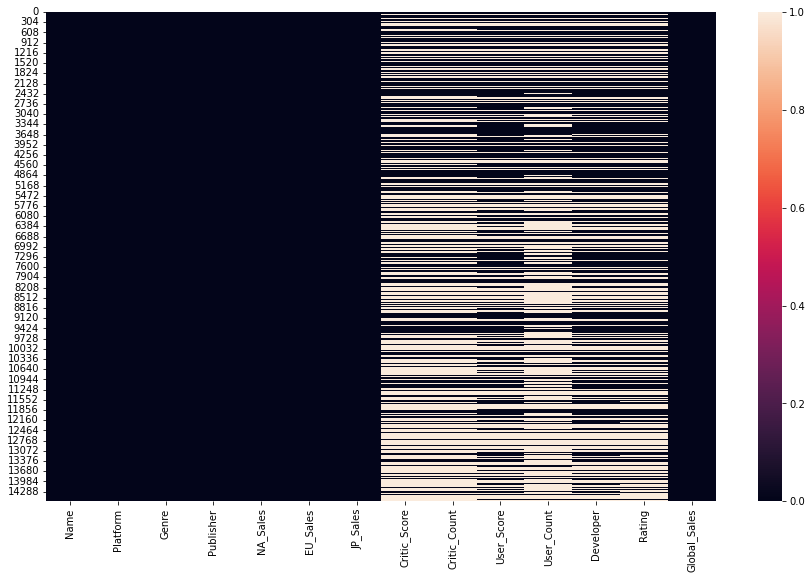

In [20]:
fig = plt.subplots(figsize=(15,9))
sns.heatmap(df_game.isnull(), cbar=True)
plt.savefig('visualization/Missing_heatmap_before.png')
plt.show()

## Missing Value Treatment

In [21]:
df_game.shape

(14576, 14)

In [22]:
df_copy = df_game.copy(deep=True)

In [23]:
# removing rows with missing values
df_copy.dropna(inplace=True)
df_copy.reset_index(inplace=True, drop=True)

In [24]:
df_copy.shape

(6230, 14)

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6230 entries, 0 to 6229
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6230 non-null   object 
 1   Platform      6230 non-null   object 
 2   Genre         6230 non-null   object 
 3   Publisher     6230 non-null   object 
 4   NA_Sales      6230 non-null   float64
 5   EU_Sales      6230 non-null   float64
 6   JP_Sales      6230 non-null   float64
 7   Critic_Score  6230 non-null   float64
 8   Critic_Count  6230 non-null   float64
 9   User_Score    6230 non-null   float64
 10  User_Count    6230 non-null   float64
 11  Developer     6230 non-null   object 
 12  Rating        6230 non-null   object 
 13  Global_Sales  6230 non-null   float64
dtypes: float64(8), object(6)
memory usage: 681.5+ KB


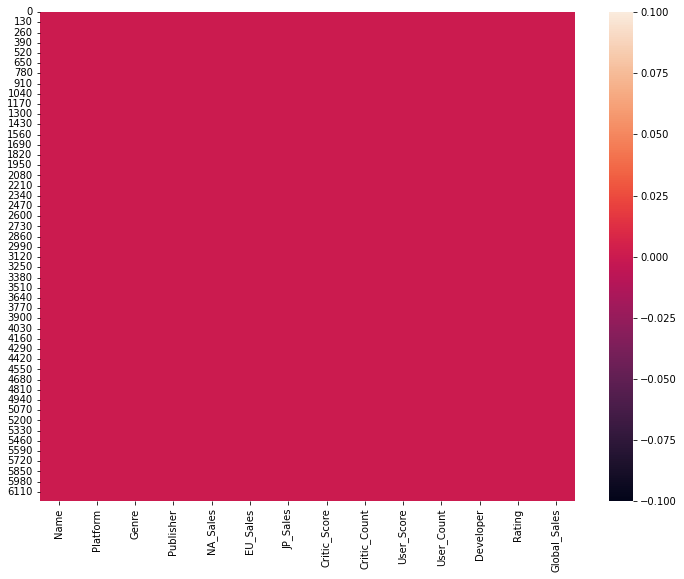

In [26]:
fig = plt.subplots(figsize=(12,9))
sns.heatmap(df_copy.isnull(), cbar=True)
plt.savefig('visualization/Missing_heatmap_after.png')
plt.show()

In [27]:
df_copy.columns

Index(['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
       'Developer', 'Rating', 'Global_Sales'],
      dtype='object')

## Visualization
### PDF's of features

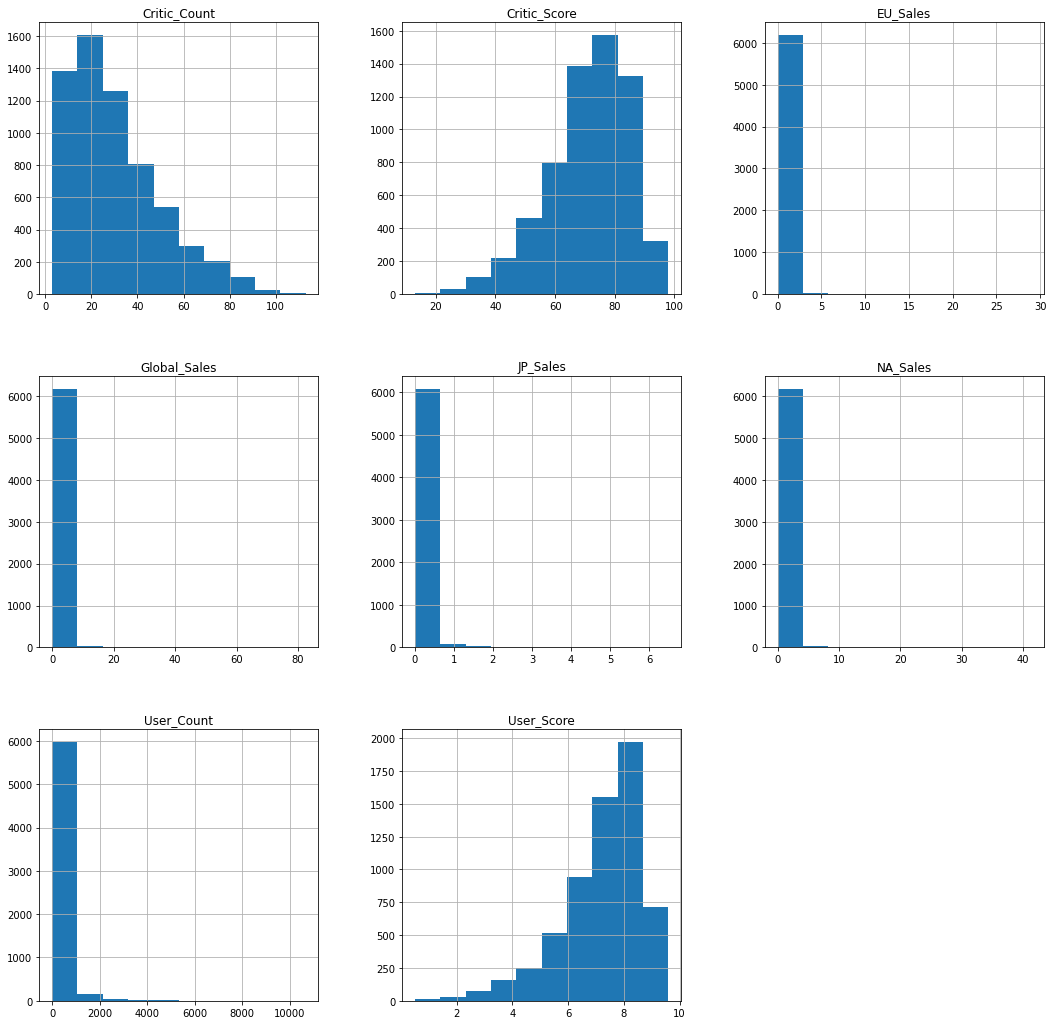

In [28]:
fig =  df_copy.hist(figsize=(18,18))
plt.savefig('visualization/num_histrogram.png')

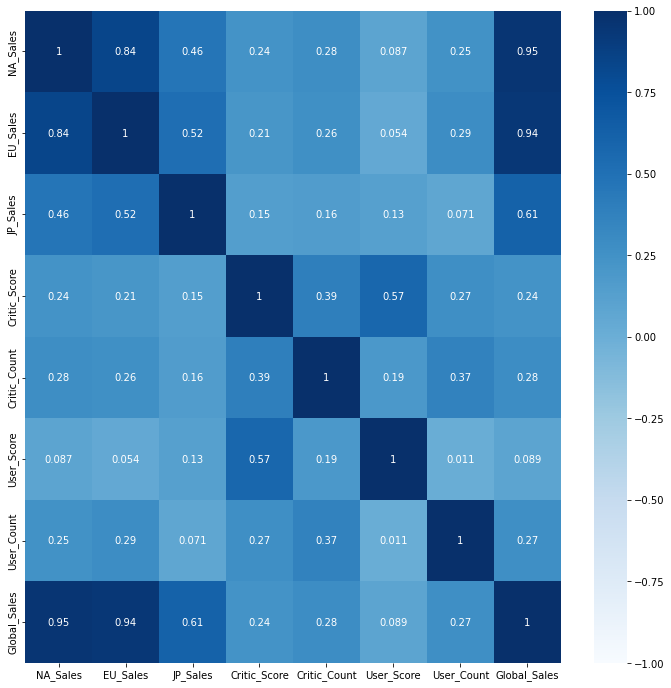

In [29]:
## checking correlation
%matplotlib inline
corr = df_copy.corr()
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, cmap='Blues', vmin=-1, vmax=1, annot=True, ax=ax)
plt.savefig('visualization/Correlation.png')
plt.show()

NA_sales and EU_sales have correlation of 0.95 and 0.94 respectively with our target variable Global_sales

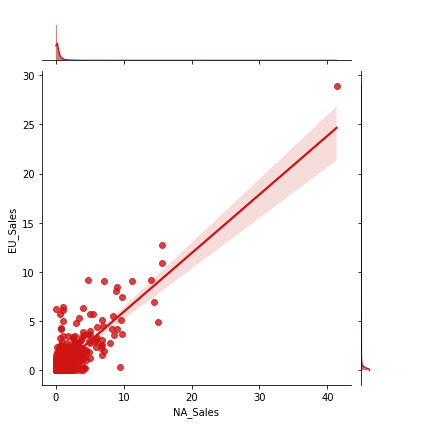

In [30]:
x = df_copy.drop(['Global_Sales'],axis = 1)
sns.jointplot(x.loc[:,'NA_Sales'], x.loc[:,'EU_Sales'], kind="reg", color="#ce1414")
plt.savefig('visualization/joint_NA_EU.png')

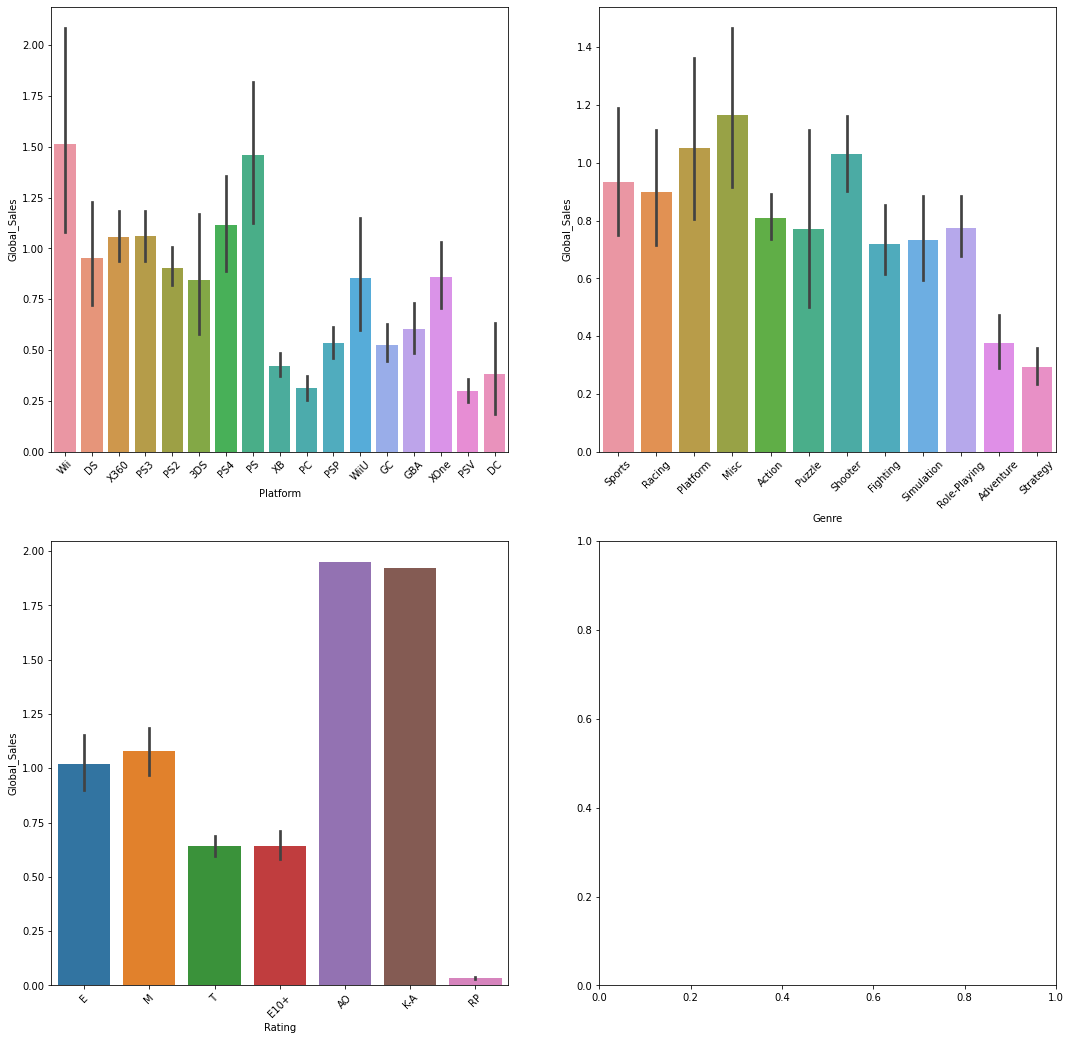

In [31]:
## Plotting barplot for categorical features to check individual categories average sales

categorical = []
numerical = []
for cols in df_copy:
    if is_numeric_dtype(df_copy[cols]):
        numerical.append(cols)
    else:
        categorical.append(cols)
        
# removing 'Name', Publisher and Developer variables from categorical
categorical.remove('Name')
categorical.remove('Publisher')
categorical.remove('Developer')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))

for col, i in zip(categorical, ax.flatten()):
    bar_plot = sns.barplot(x=col, y='Global_Sales', ax=i, data = df_copy)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(45)

plt.savefig('visualization/cat_GSales_barplot.png')
plt.show()

<Figure size 720x576 with 0 Axes>

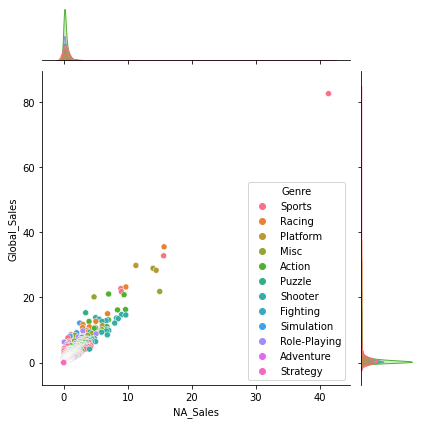

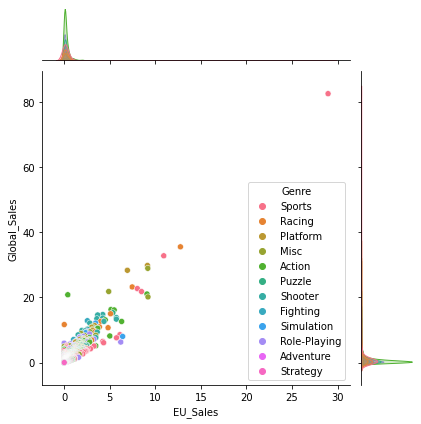

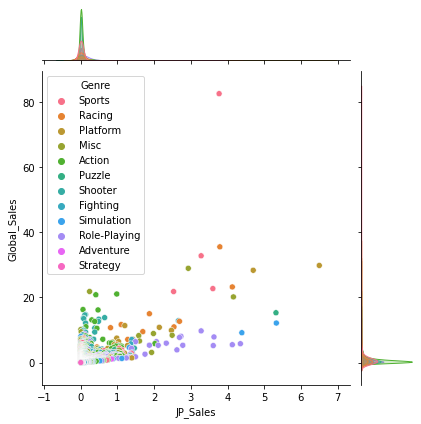

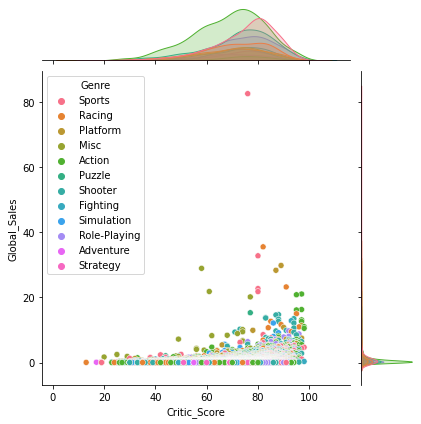

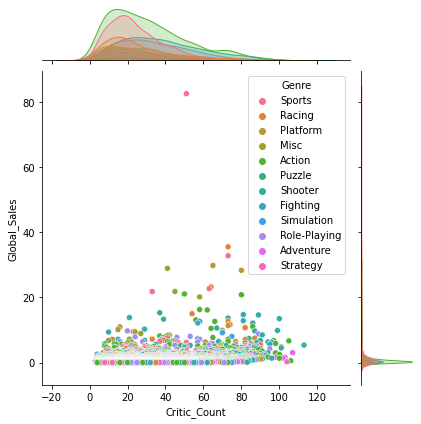

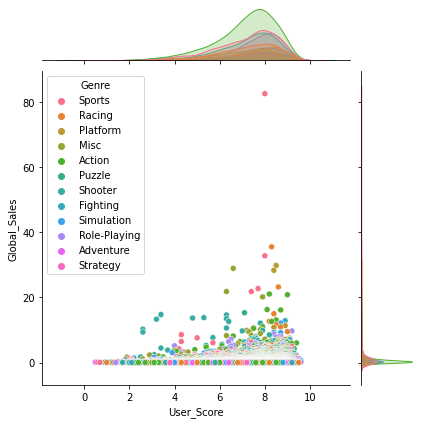

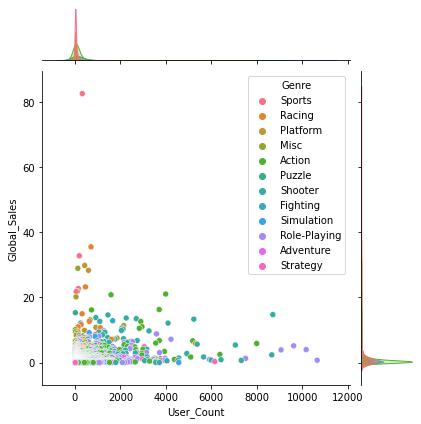

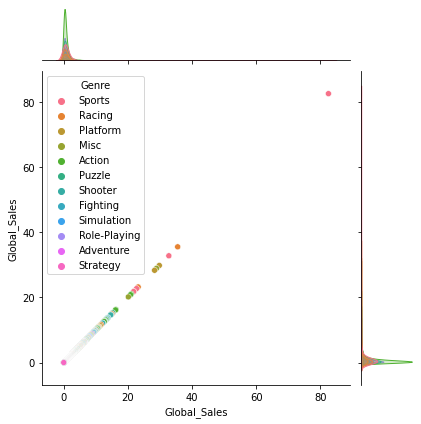

In [32]:
## Jointplot between Continuous Features and Global_Sales
%matplotlib inline
plt.figure(figsize=(10,8))
for col in numerical:
    sns.jointplot(col, 'Global_Sales', data=df_copy, color='Green', hue='Genre')
    plt.savefig('visualization/{}_vs_GSales.png'.format(col))
    
plt.rcParams["figure.figsize"] = (10,8)
plt.show()

### Checking Outliers in Data

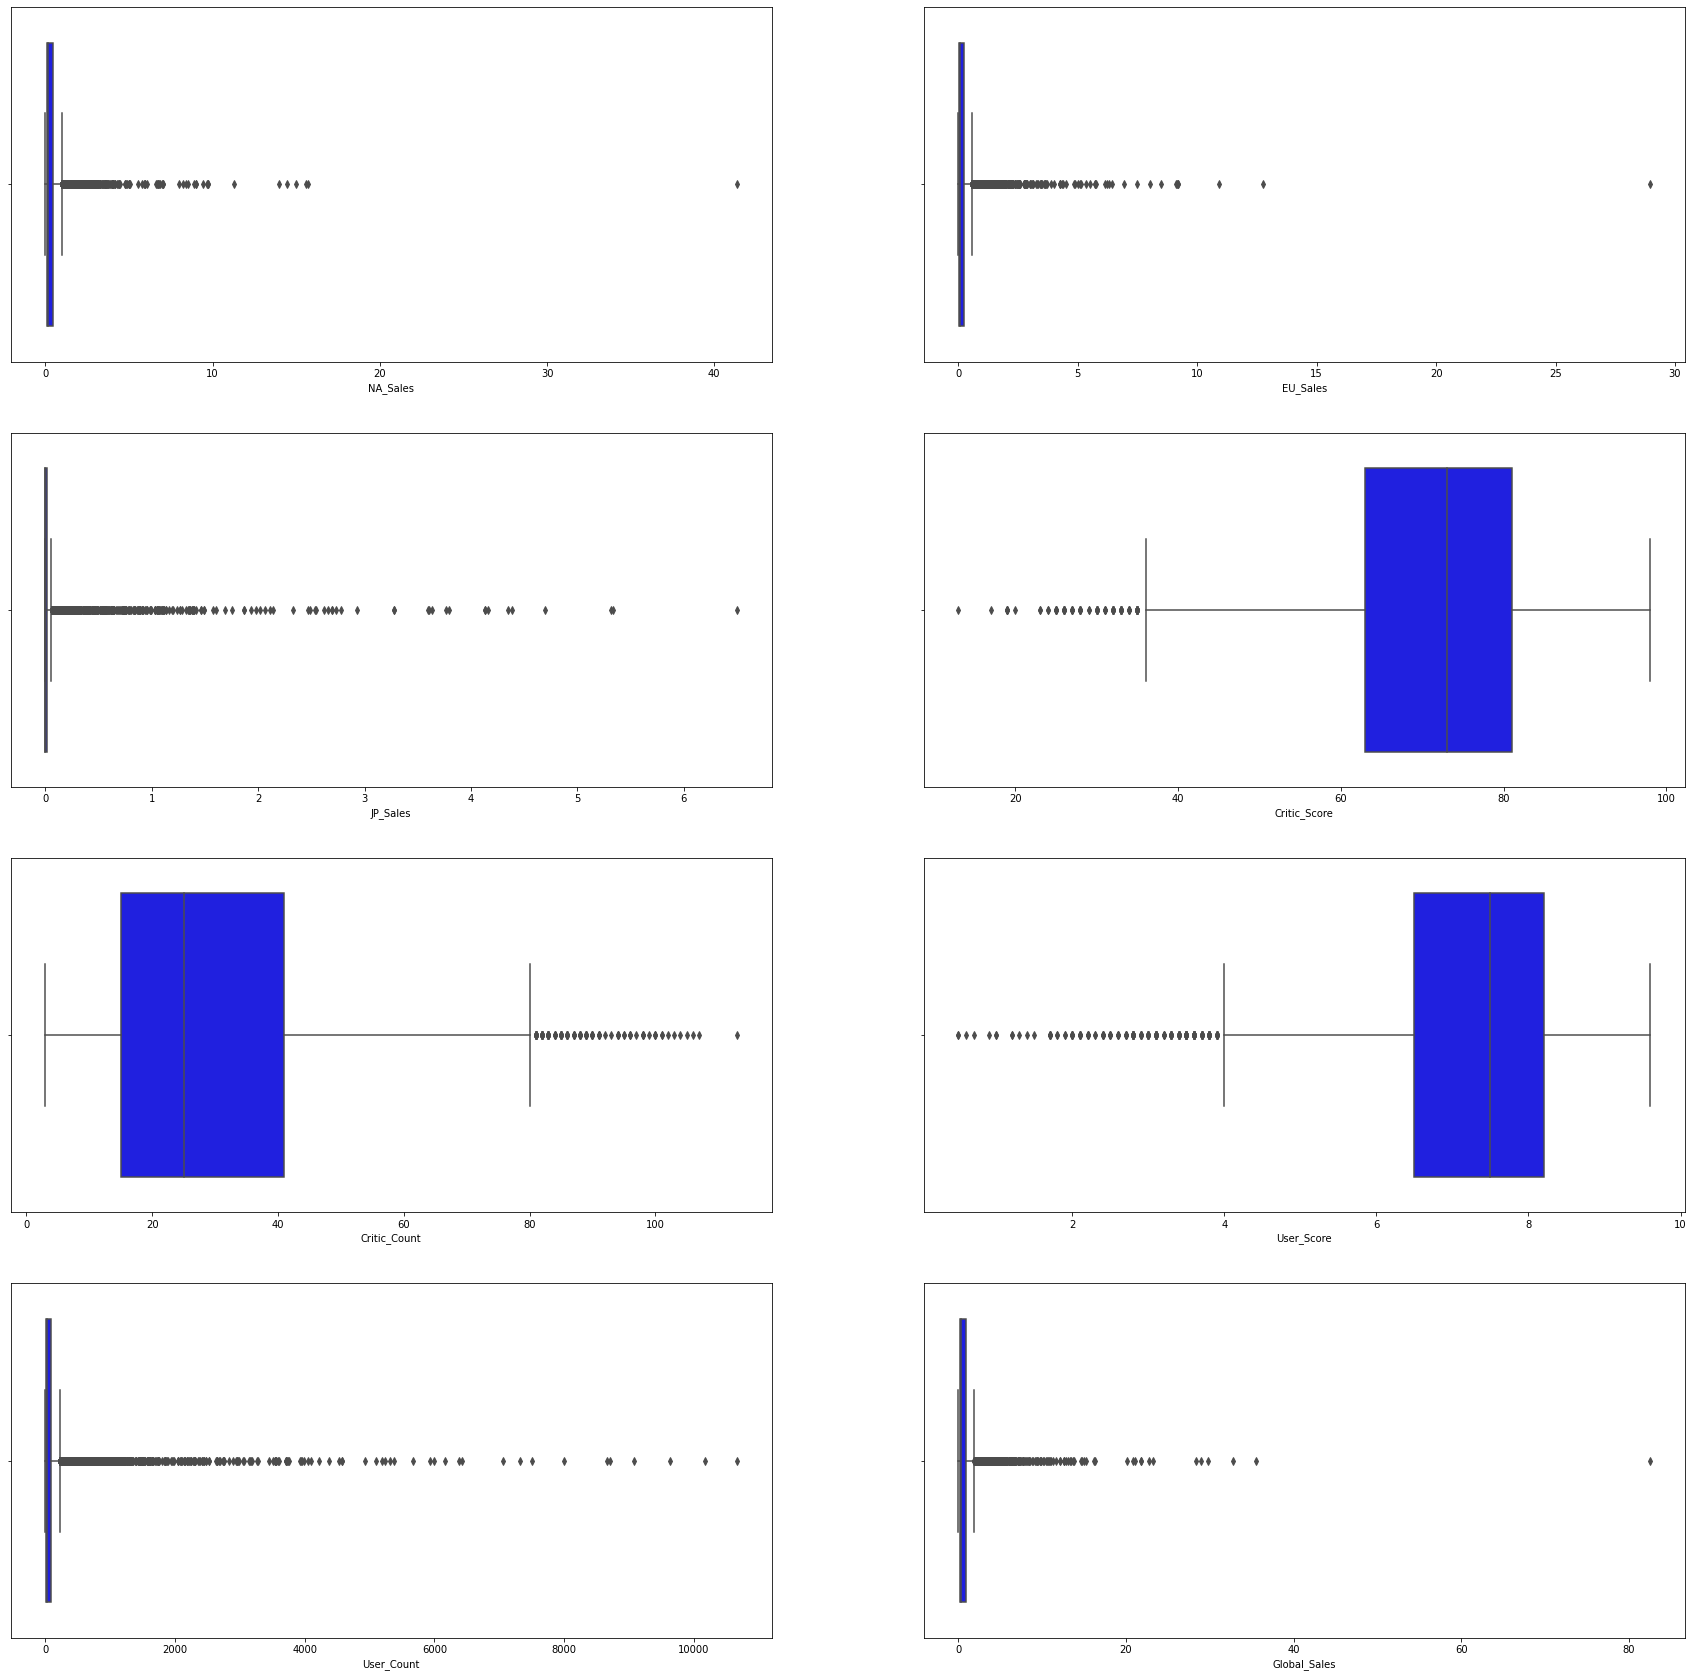

In [33]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(30,30))
for col, i in zip(numerical, ax.flatten()):
    sns.boxplot(col, data=df_copy, color='Blue', ax=i)
plt.savefig('visualization/outliers_box.png')
plt.show()

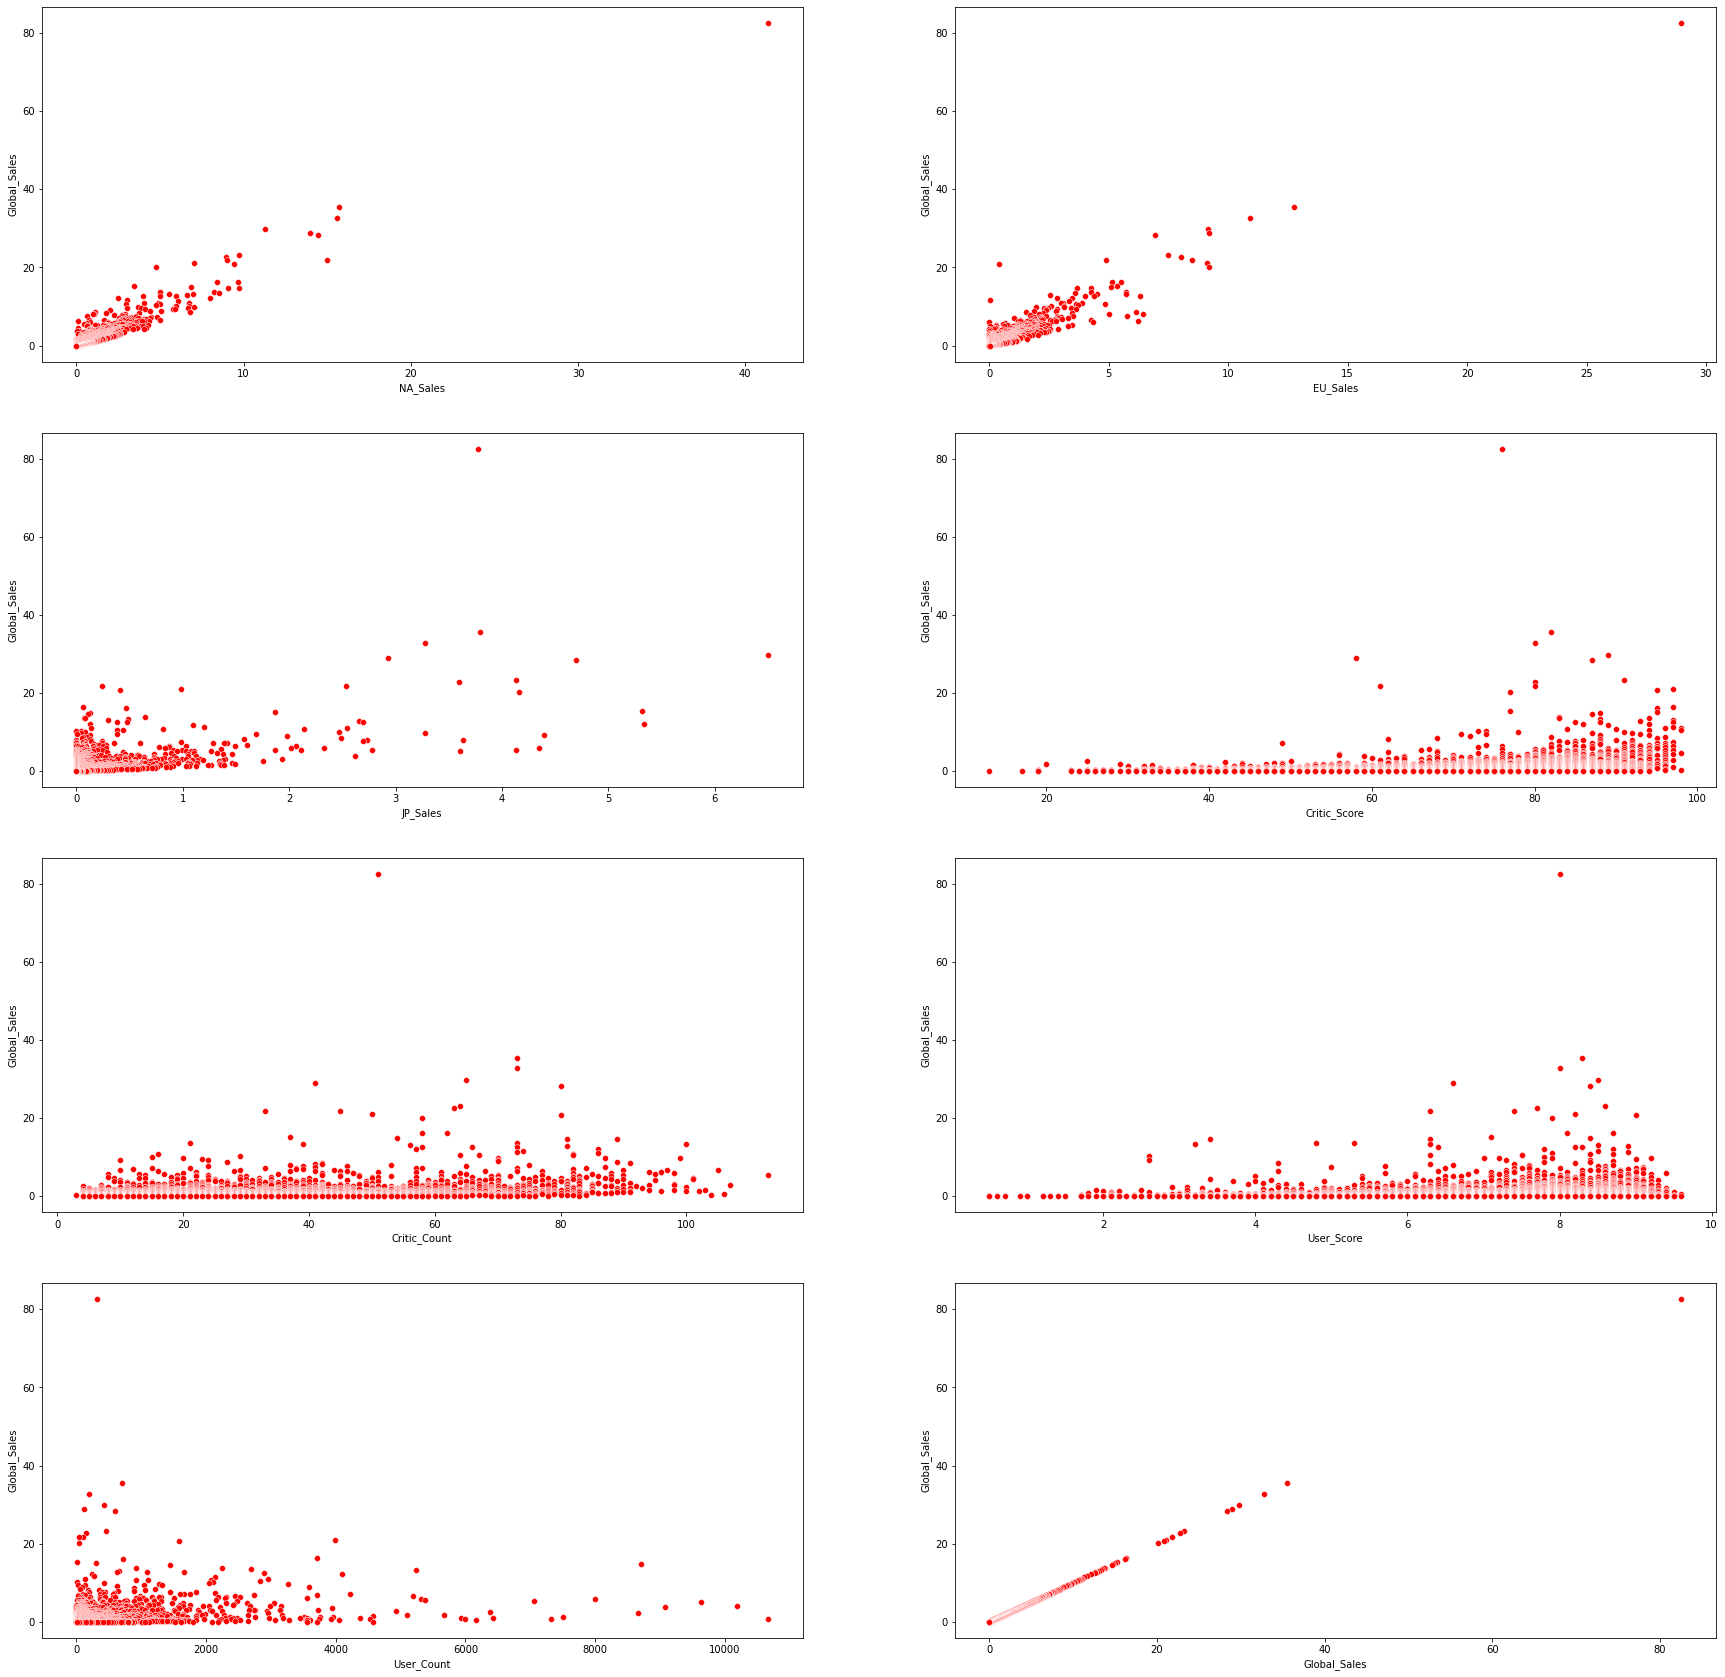

In [34]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(30,30))
for col, i in zip(numerical, ax.flatten()):
    sns.scatterplot(x=col, y='Global_Sales', data=df_copy, color='Red', ax=i)

plt.savefig('visualization/outliers_scatter.png')
plt.show()

## Model Building And Eavaluation

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6230 entries, 0 to 6229
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6230 non-null   object 
 1   Platform      6230 non-null   object 
 2   Genre         6230 non-null   object 
 3   Publisher     6230 non-null   object 
 4   NA_Sales      6230 non-null   float64
 5   EU_Sales      6230 non-null   float64
 6   JP_Sales      6230 non-null   float64
 7   Critic_Score  6230 non-null   float64
 8   Critic_Count  6230 non-null   float64
 9   User_Score    6230 non-null   float64
 10  User_Count    6230 non-null   float64
 11  Developer     6230 non-null   object 
 12  Rating        6230 non-null   object 
 13  Global_Sales  6230 non-null   float64
dtypes: float64(8), object(6)
memory usage: 681.5+ KB


In [36]:
df_new = df_copy.copy(deep=True)

In [37]:
df_new.drop(['Name', 'Publisher', 'Developer'], axis=1, inplace=True)
df_new.reset_index(drop=True, inplace=True)
df_new.head()

Platform     Genre  NA_Sales  EU_Sales  JP_Sales  Critic_Score  \
0      Wii    Sports     41.36     28.96      3.77          76.0   
1      Wii    Racing     15.68     12.76      3.79          82.0   
2      Wii    Sports     15.61     10.93      3.28          80.0   
3       DS  Platform     11.28      9.14      6.50          89.0   
4      Wii      Misc     13.96      9.18      2.93          58.0   

   Critic_Count  User_Score  User_Count Rating  Global_Sales  
0          51.0         8.0       322.0      E         82.53  
1          73.0         8.3       709.0      E         35.52  
2          73.0         8.0       192.0      E         32.77  
3          65.0         8.5       431.0      E         29.80  
4          41.0         6.6       129.0      E         28.92

In [38]:
df_dummy = pd.get_dummies(df_new, drop_first=True)
df_dummy.head()

NA_Sales  EU_Sales  JP_Sales  Critic_Score  Critic_Count  User_Score  \
0     41.36     28.96      3.77          76.0          51.0         8.0   
1     15.68     12.76      3.79          82.0          73.0         8.3   
2     15.61     10.93      3.28          80.0          73.0         8.0   
3     11.28      9.14      6.50          89.0          65.0         8.5   
4     13.96      9.18      2.93          58.0          41.0         6.6   

   User_Count  Global_Sales  Platform_DC  Platform_DS  ...  Genre_Shooter  \
0       322.0         82.53            0            0  ...              0   
1       709.0         35.52            0            0  ...              0   
2       192.0         32.77            0            0  ...              0   
3       431.0         29.80            0            1  ...              0   
4       129.0         28.92            0            0  ...              0   

   Genre_Simulation  Genre_Sports  Genre_Strategy  Rating_E  Rating_E10+  \
0                 0             1               0         1            0   
1                 0             0               0         1            0   
2                 0             1               0         1            0   
3                 0             0               0         1            0   
4                 0             0               0         1            0   

   Rating_K-A  Rating_M  Rating_RP  Rating_T  
0           0         0          0         0  
1           0         0          0         0  
2           0         0          0         0  
3           0         0          0         0  
4           0         0          0         0  

[5 rows x 41 columns]

In [39]:
df_dummy.shape

(6230, 41)

In [40]:
df_dummy.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Global_Sales', 'Platform_DC',
       'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC',
       'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4',
       'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU',
       'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_E',
       'Rating_E10+', 'Rating_K-A', 'Rating_M', 'Rating_RP', 'Rating_T'],
      dtype='object')

In [41]:
df_dummy.drop(['Rating_E', 'Rating_K-A', 'Rating_RP'], inplace=True, axis=True)

In [42]:
X = df_dummy.drop('Global_Sales', axis=1)
X.shape, type(X)

((6230, 37), pandas.core.frame.DataFrame)

In [43]:
Y = pd.DataFrame(df_dummy['Global_Sales'])
Y.shape, type(Y)

((6230, 1), pandas.core.frame.DataFrame)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled_X = scaler.fit_transform(X)
print(scaled_X)

[[40.62012992 40.06248445 12.31596666 ... -0.39667015 -0.51799853
  -0.72257243]
 [15.13346687 17.44968611 12.38253848 ... -0.39667015 -0.51799853
  -0.72257243]
 [15.06399388 14.89527741 10.6849573  ... -0.39667015 -0.51799853
  -0.72257243]
 ...
 [-0.42848316 -0.34742369 -0.23281968 ... -0.39667015  1.93050741
  -0.72257243]
 [-0.41855844 -0.36138221 -0.23281968 ... -0.39667015 -0.51799853
   1.3839443 ]
 [-0.42848316 -0.34742369 -0.23281968 ...  2.5209863  -0.51799853
  -0.72257243]]


In [47]:
import pickle
pickle.dump(scaler, open('Inference_pipeline/scaler_std.pkl','wb'))

In [48]:
scaled_X.shape

(6230, 37)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size = 0.2, random_state = 1)

In [50]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators = 200, learning_rate= 0.08)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
# Predicting test set results
y_pred_xgb = model_xgb.predict(X_test)

In [52]:
# Calculate RMSE
xgb_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
print('Root Mean Squared Error (RMSE):', xgb_RMSE)

#Calculate R-Squared
xgb_r2 = r2_score(y_test, y_pred_xgb)
print('R-Squared:', xgb_r2)

Root Mean Squared Error (RMSE): 0.16166497606124258
R-Squared: 0.9907449239158194


In [53]:
# create the result table for all accuracy scores
cols = ['Model', 'RMSE', 'R-Squared']

result_tabulation = pd.DataFrame(columns = cols)

linreg_logmodel_full_metrics = pd.Series({'Model': "XGBoost Without missing value imputaion ",
                     'RMSE': xgb_RMSE,
                     'R-Squared': xgb_r2    
                   })

# Appinding row to our dataframe
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared
0  XGBoost Without missing value imputaion   0.161665   0.990745

In [54]:
import statsmodels.api as sm

In [55]:
X_sm = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_sm, Y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4984, 38)
(1246, 38)
(4984, 1)
(1246, 1)


In [56]:
model_sm = sm.OLS(y_train, X_train).fit()

In [57]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.556e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:39:29   Log-Likelihood:                 1048.6
No. Observations:                4984   AIC:                            -2021.
Df Residuals:                    4946   BIC:                            -1774.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0336      0

In [58]:
y_pred_sm = model_sm.predict(X_test)

In [59]:
# Calculate RMSE
sm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_sm))
print('Root Mean Squared Error (RMSE):', sm_RMSE)

#Calculate R-Squared
sm_r2 = r2_score(y_test, y_pred_sm)
print('R-Squared:', sm_r2)

Root Mean Squared Error (RMSE): 0.10891312796018333
R-Squared: 0.9957994266676081


In [60]:
linreg_logmodel_full_metrics = pd.Series({'Model': "OLS Without missing value imputaion ",
                     'RMSE': sm_RMSE,
                     'R-Squared': sm_r2    
                   })
# Appinding row to our dataframe
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared
0  XGBoost Without missing value imputaion   0.161665   0.990745
1      OLS Without missing value imputaion   0.108913   0.995799

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
tuned_paramaters = [{'penalty': ['l1', 'l2', 'elasticnet'],
                     'alpha': [0.1, 0.2, 0.5, 0.001, 0.0001, 0.0002, 0.0005, 0.002],
                     'max_iter': [1000, 5000, 2000, 3000, 500],
                     'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
                     #'max_leaf_nodes': [10, 15]
                    }]

In [64]:
from sklearn.linear_model import SGDRegressor

model_sgd_CV = SGDRegressor(random_state=1)

grid = GridSearchCV(estimator = model_sgd_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'alpha': 0.5, 'learning_rate': 'adaptive', 'max_iter': 1000, 'penalty': 'elasticnet'} 



In [65]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size = 0.2, random_state = 1)

In [66]:
model_sgd = SGDRegressor(alpha= 0.2, learning_rate= 'adaptive', max_iter= 1000, penalty= 'elasticnet')
model_sgd.fit(X_train, y_train)

SGDRegressor(alpha=0.2, learning_rate='adaptive', penalty='elasticnet')

In [67]:
y_pred_sgd = model_sgd.predict(X_test)

In [68]:
# Calculate RMSE
sgd_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_sgd))
print('Root Mean Squared Error (RMSE):', sgd_RMSE)

#Calculate R-Squared
sgd_r2 = r2_score(y_test, y_pred_sgd)
print('R-Squared:', sgd_r2)

Root Mean Squared Error (RMSE): 0.15820582713507128
R-Squared: 0.991136748760092


In [69]:
linreg_logmodel_full_metrics = pd.Series({'Model': "SGD Without missing value imputaion ",
                     'RMSE': sgd_RMSE,
                     'R-Squared': sgd_r2    
                   })
# Appinding row to our dataframe
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared
0  XGBoost Without missing value imputaion   0.161665   0.990745
1      OLS Without missing value imputaion   0.108913   0.995799
2      SGD Without missing value imputaion   0.158206   0.991137

In [70]:
y_test_sgd = y_test.to_numpy()
y_test_sgd = y_test_sgd.flatten()
residual_sgd = y_test_sgd -  y_pred_sgd

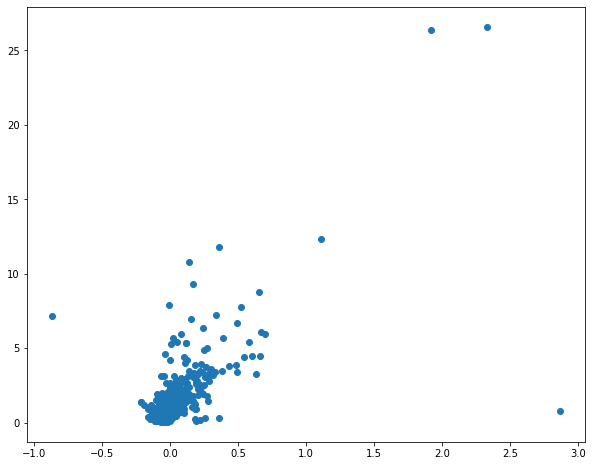

In [71]:
plt.scatter(residual_sgd,y_pred_sgd)

plt.show()

In [72]:
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20],
                     'max_depth': [8, 10],
                     'min_samples_leaf': [5,10],
                     'max_leaf_nodes': [10, 15]
#                      'criterion': ['squared_error', 'absolute_error', 'poisson']
                    }]

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_CV= RandomForestRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = rf_reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'max_depth': 8, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100} 



In [74]:
model_rf = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
model_rf = model_rf.fit(X_train, y_train)

In [75]:
# predict the class labels using 'X_test'
y_pred_rf = model_rf.predict(X_test)

In [76]:
# Calculate RMSE
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error (RMSE):', rf_RMSE)

#Calculate R-Squared
rf_r2 = r2_score(y_test, y_pred_rf)
print('R-Squared:', rf_r2)

Root Mean Squared Error (RMSE): 0.3278656940719094
R-Squared: 0.9619337528614956


In [77]:
linreg_logmodel_full_metrics = pd.Series({'Model': "Random Forest Without missing value imputaion ",
                     'RMSE': rf_RMSE,
                     'R-Squared': rf_r2    
                   })
# Appinding row to our dataframe
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared
0        XGBoost Without missing value imputaion   0.161665   0.990745
1            OLS Without missing value imputaion   0.108913   0.995799
2            SGD Without missing value imputaion   0.158206   0.991137
3  Random Forest Without missing value imputaion   0.327866   0.961934

In [78]:
y_test_ = y_test.to_numpy()
y_test_ = y_test_.flatten()

In [79]:
residuals = y_test_ - y_pred_rf
residuals = residuals
len(residuals)

1246

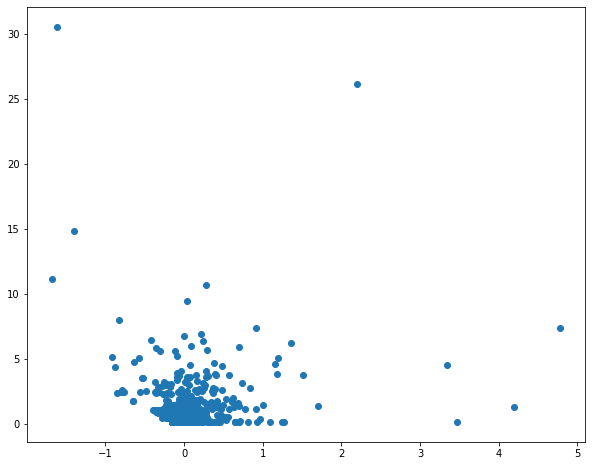

In [80]:
import matplotlib.pyplot as plt

plt.scatter(residuals,y_pred_rf)

plt.show()

<AxesSubplot:>

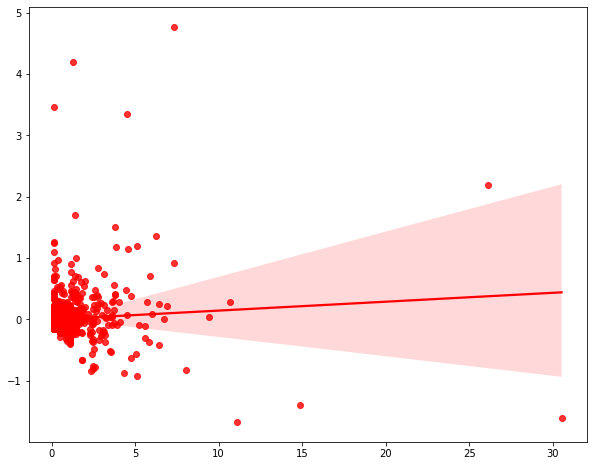

In [81]:
sns.regplot(y = residuals, x = y_pred_rf, data = None, scatter = True, color = 'red')

### Feature Engineering and Feature Selection

In [82]:
df_copy1 = df_game.copy(deep=True)

In [83]:
df_copy1.isnull().sum()

Name               2
Platform           0
Genre              2
Publisher         49
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score    7359
Critic_Count    7359
User_Score      5816
User_Count      7780
Developer       5747
Rating          5872
Global_Sales       0
dtype: int64

In [84]:
df_copy1.drop(['Name', 'Publisher', 'Developer'], axis=1, inplace=True)
df_copy1.reset_index(drop=True, inplace=True)

In [85]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      14576 non-null  object 
 1   Genre         14574 non-null  object 
 2   NA_Sales      14576 non-null  float64
 3   EU_Sales      14576 non-null  float64
 4   JP_Sales      14576 non-null  float64
 5   Critic_Score  7217 non-null   float64
 6   Critic_Count  7217 non-null   float64
 7   User_Score    8760 non-null   float64
 8   User_Count    6796 non-null   float64
 9   Rating        8704 non-null   object 
 10  Global_Sales  14576 non-null  float64
dtypes: float64(8), object(3)
memory usage: 1.2+ MB


In [86]:
df_copy2 = df_copy1.copy(deep=True)

In [87]:
df_copy2.dropna(inplace=True)
df_copy2.reset_index(drop=True, inplace=True)

In [88]:
df_numeric = df_copy2.select_dtypes(include=[np.number])

In [89]:
X = df_numeric.iloc[:, 0:7]
y = df_numeric.iloc[:,-1]

[0.50349672 0.42182772 0.06299921 0.00330995 0.00374709 0.00165017
 0.00296915]


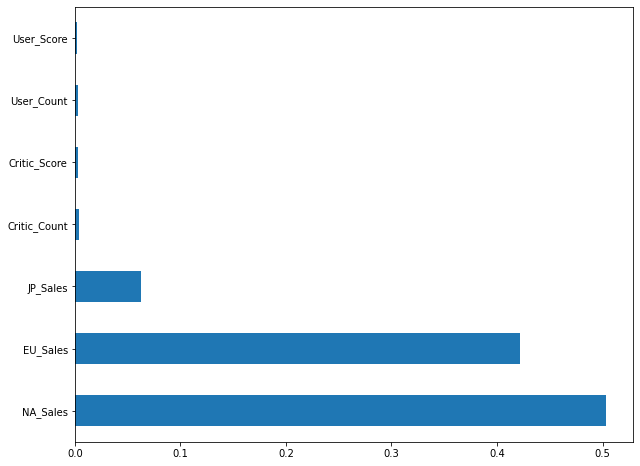

In [90]:
# Findind Out feature importance(Continuous Features) using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [91]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.30, random_state=0)

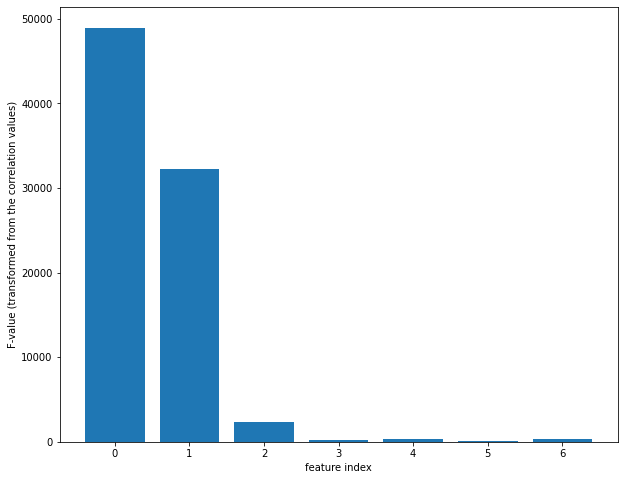

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train_f, y_train_f)
# transform train input data
X_train_fs = f_selector.transform(X_train_f)
# transform test input data
X_test_fs = f_selector.transform(X_test_f)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

#### From above 2 plots it is clear that there are 3 most important continuous features in data ('NA_Sales', 'EU_Sales', and 'JP_Sales')

In [93]:
X.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count'],
      dtype='object')

In [94]:
df_copy1.columns

Index(['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating', 'Global_Sales'],
      dtype='object')

In [95]:
#droping all continuous features other than 'NA_Sales', 'EU_Sales', and 'JP_Sales'
df_copy1.drop(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], inplace=True, axis=1)
df_copy1.reset_index(drop=True, inplace=True)
df_copy1.head()

Platform         Genre  NA_Sales  EU_Sales  JP_Sales Rating  Global_Sales
0      Wii        Sports     41.36     28.96      3.77      E         82.53
1      NES      Platform     29.08      3.58      6.81    NaN         40.24
2      Wii        Racing     15.68     12.76      3.79      E         35.52
3      Wii        Sports     15.61     10.93      3.28      E         32.77
4       GB  Role-Playing     11.27      8.89     10.22    NaN         31.37

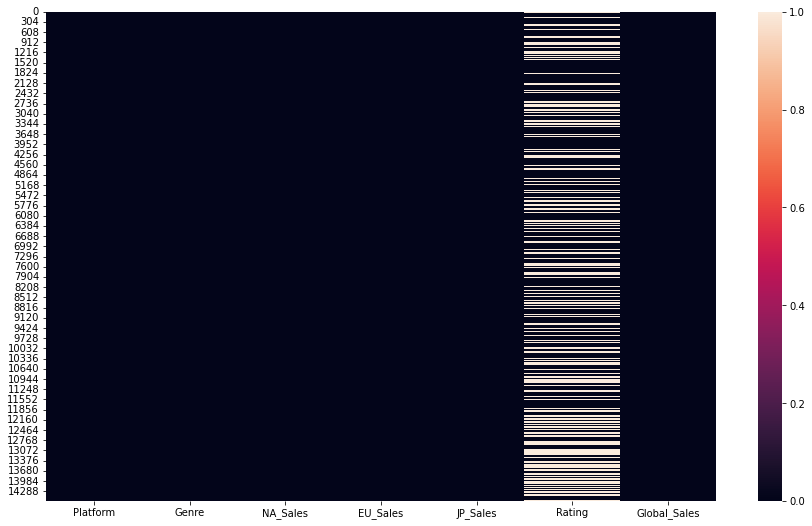

In [96]:
fig = plt.subplots(figsize=(15,9))
sns.heatmap(df_copy1.isnull(), cbar=True)
plt.savefig('visualization/Missing_heatmap_before.png')
plt.show()

After looking into heatmap abopve it is clear that most of the missing data is in 'Rating' which is one of the important categorical feature, so let's try to impute missing Values

### Missing Data Imputation

In [97]:
df_rating = df_copy1['Rating']

In [98]:
df_dummy_i = df_copy1.drop(['Rating'], axis=1)
df_dummy_i = pd.get_dummies(df_dummy_i, drop_first=True)
df_dummy_i.drop(['Platform_3DO', 'Platform_GG', 'Platform_PCFX', 'Platform_TG16', 'Platform_WS'], axis=1, inplace=True)

In [99]:
df_impute = pd.concat([df_dummy_i, df_rating], axis=1)
df_impute.sort_index(axis=1, inplace=True)
df_impute.head()

EU_Sales  Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  \
0     28.96                0               0           0               0   
1      3.58                0               0           0               1   
2     12.76                0               0           0               0   
3     10.93                0               0           0               0   
4      8.89                0               0           0               0   

   Genre_Puzzle  Genre_Racing  Genre_Role-Playing  Genre_Shooter  \
0             0             0                   0              0   
1             0             0                   0              0   
2             0             1                   0              0   
3             0             0                   0              0   
4             0             0                   1              0   

   Genre_Simulation  ...  Platform_PSV  Platform_SAT  Platform_SCD  \
0                 0  ...             0             0             0   
1                 0  ...             0             0             0   
2                 0  ...             0             0             0   
3                 0  ...             0             0             0   
4                 0  ...             0             0             0   

   Platform_SNES  Platform_Wii  Platform_WiiU  Platform_X360  Platform_XB  \
0              0             1              0              0            0   
1              0             0              0              0            0   
2              0             1              0              0            0   
3              0             1              0              0            0   
4              0             0              0              0            0   

   Platform_XOne  Rating  
0              0       E  
1              0     NaN  
2              0       E  
3              0       E  
4              0     NaN  

[5 rows x 41 columns]

In [100]:
test_impute = df_impute[df_impute['Rating'].isnull() == True]
train_impute = df_impute[df_impute['Rating'].isnull() == False]

In [101]:
sales_train = train_impute['Global_Sales']
train_impute.drop('Global_Sales', axis=1, inplace=True)
sales_test = test_impute['Global_Sales']
test_impute.drop('Global_Sales', axis=1, inplace=True)

In [102]:
from sklearn.preprocessing  import LabelEncoder
X_impute = train_impute.drop('Rating', axis=1)
X_scaler = scaler.fit_transform(X_impute)
y_impute = train_impute['Rating']
X_impute = pd.get_dummies(X_impute, drop_first=True)
le = LabelEncoder()
y_impute = le.fit_transform(y_impute)

In [103]:
pickle.dump(le, open('Inference_pipeline/encoder.pkl','wb'))

In [104]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_impute, y_impute, test_size=0.2, random_state=1)

Using XGBClassifier for predicting missing data

In [105]:
from xgboost import XGBClassifier

tuned_paramaters = [{'n_estimators': [50, 85, 100],
                     'booster': ['gbtree', 'gblinear',' dart'],
                     'max_depth': [8, 10],
                     'learning_rate': [0.1,0.2,0.01,0.02]
                    }]

In [106]:
xgb =  XGBClassifier(random_state=1)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = xgb, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train_i, y_train_i)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

[09:53:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:53:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:53:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[09:53:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:53:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:53:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[09:53:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[09:54:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[09:54:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[09:54:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[09:54:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[09:54:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:54:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[09:55:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:55:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:55:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[09:55:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:55:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:55:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[09:55:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:55:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:55:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

In [107]:
model_impute = XGBClassifier(n_estimators = 85, booster = 'gbtree', learning_rate= 0.1, max_depth=8,)
model_impute.fit(X_train_i, y_train_i)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=85, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_pred_impute = model_impute.predict(X_test_i)

In [109]:
xgb_impute = np.sqrt(metrics.mean_squared_error(y_test_i, y_pred_impute))
print('Root Mean Squared Error (RMSE):', xgb_impute)

Root Mean Squared Error (RMSE): 2.534086972354695


In [110]:
import pickle
file_name = "Inference_pipeline/imputer.pkl"

# save
pickle.dump(xgb_impute, open(file_name, "wb"))

In [111]:
test_impute = test_impute.drop('Rating', axis=1)
test_impute = pd.get_dummies(test_impute, drop_first=True)

In [112]:
test_impute_pred = model_impute.predict(test_impute)

In [113]:
test_impute_pred = le.inverse_transform(test_impute_pred)
test_impute_pred

array(['E', 'T', 'E', ..., 'M', 'E', 'T'], dtype=object)

In [114]:
test_impute['Rating'] = test_impute_pred

In [115]:
test_impute['Global_Sales'] = sales_test 

In [116]:
train_impute['Global_Sales'] = sales_train

In [117]:
df_imputed = pd.concat([train_impute, test_impute], axis=0)
# df_imputed.sort_index(inplace=True)
df_imputed.head()

EU_Sales  Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  \
0     28.96                0               0           0               0   
2     12.76                0               0           0               0   
3     10.93                0               0           0               0   
6      9.14                0               0           0               1   
7      9.18                0               0           1               0   

   Genre_Puzzle  Genre_Racing  Genre_Role-Playing  Genre_Shooter  \
0             0             0                   0              0   
2             0             1                   0              0   
3             0             0                   0              0   
6             0             0                   0              0   
7             0             0                   0              0   

   Genre_Simulation  ...  Platform_SAT  Platform_SCD  Platform_SNES  \
0                 0  ...             0             0              0   
2                 0  ...             0             0              0   
3                 0  ...             0             0              0   
6                 0  ...             0             0              0   
7                 0  ...             0             0              0   

   Platform_Wii  Platform_WiiU  Platform_X360  Platform_XB  Platform_XOne  \
0             1              0              0            0              0   
2             1              0              0            0              0   
3             1              0              0            0              0   
6             0              0              0            0              0   
7             1              0              0            0              0   

   Rating  Global_Sales  
0       E         82.53  
2       E         35.52  
3       E         32.77  
6       E         29.80  
7       E         28.92  

[5 rows x 41 columns]

In [118]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14576 entries, 0 to 14575
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EU_Sales            14576 non-null  float64
 1   Genre_Adventure     14576 non-null  uint8  
 2   Genre_Fighting      14576 non-null  uint8  
 3   Genre_Misc          14576 non-null  uint8  
 4   Genre_Platform      14576 non-null  uint8  
 5   Genre_Puzzle        14576 non-null  uint8  
 6   Genre_Racing        14576 non-null  uint8  
 7   Genre_Role-Playing  14576 non-null  uint8  
 8   Genre_Shooter       14576 non-null  uint8  
 9   Genre_Simulation    14576 non-null  uint8  
 10  Genre_Sports        14576 non-null  uint8  
 11  Genre_Strategy      14576 non-null  uint8  
 12  JP_Sales            14576 non-null  float64
 13  NA_Sales            14576 non-null  float64
 14  Platform_3DS        14576 non-null  uint8  
 15  Platform_DC         14576 non-null  uint8  
 16  Plat

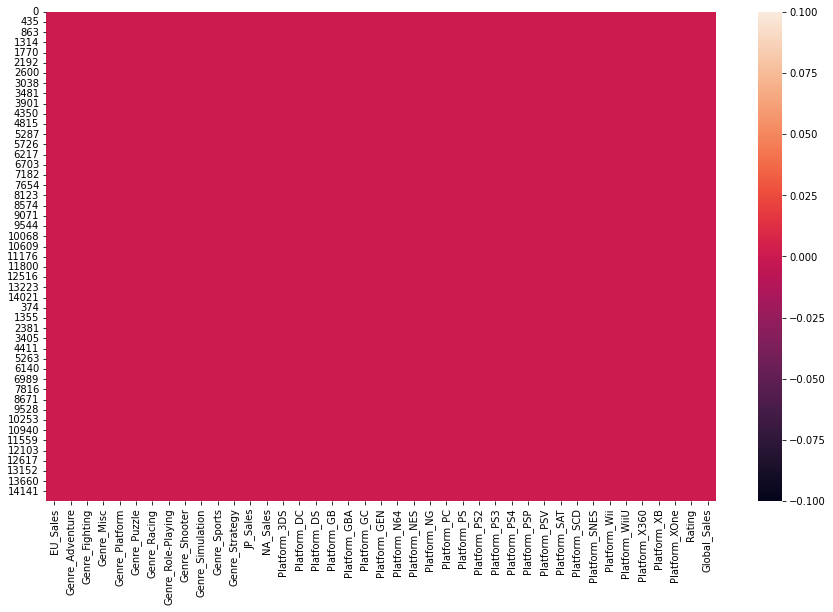

In [119]:
fig = plt.subplots(figsize=(15,9))
sns.heatmap(df_imputed.isnull(), cbar=True)
plt.savefig('visualization/Missing_heatmap_before.png')
plt.show()

Missing values are now gone and it's good for our model

In [120]:
df_imputed = pd.get_dummies(df_imputed, drop_first=True)

In [121]:
df_copy1.shape

(14576, 7)

In [122]:
df_imputed.drop(['Rating_E', 'Rating_K-A', 'Rating_RP'], inplace=True, axis=1)
X_final = df_imputed.drop('Global_Sales', axis=1)
scaler = StandardScaler()
# transform data
scaled_X = scaler.fit_transform(X_final)
print(scaled_X)
y_final = df_imputed['Global_Sales']
X_final_ = sm.add_constant(X_final)

[[ 5.36903753e+01 -2.89478932e-01 -2.29283162e-01 ... -2.19196769e-02
  -3.65169665e-01 -7.57569868e-01]
 [ 2.34853889e+01 -2.89478932e-01 -2.29283162e-01 ... -2.19196769e-02
  -3.65169665e-01 -7.57569868e-01]
 [ 2.00733442e+01 -2.89478932e-01 -2.29283162e-01 ... -2.19196769e-02
  -3.65169665e-01 -7.57569868e-01]
 ...
 [-3.05699054e-01  3.45448283e+00 -2.29283162e-01 ... -2.19196769e-02
   2.73845310e+00 -7.57569868e-01]
 [-3.05699054e-01 -2.89478932e-01 -2.29283162e-01 ... -2.19196769e-02
  -3.65169665e-01 -7.57569868e-01]
 [-3.05699054e-01 -2.89478932e-01 -2.29283162e-01 ... -2.19196769e-02
  -3.65169665e-01  1.32001026e+00]]


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_final_, y_final, test_size=0.3, random_state=1)
print('X_train', X_train.shape, type(X_train))
print('X_test', X_test.shape, type(X_train))
print('y_train', y_train.shape, type(X_train))
print('y_test', y_test.shape, type(X_train))

X_train (10203, 44) <class 'pandas.core.frame.DataFrame'>
X_test (4373, 44) <class 'pandas.core.frame.DataFrame'>
y_train (10203,) <class 'pandas.core.frame.DataFrame'>
y_test (4373,) <class 'pandas.core.frame.DataFrame'>


In [124]:
model_sm_new = (sm.OLS(y_train, X_train)).fit()

In [125]:
model_sm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.872e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:55:41   Log-Likelihood:                 4835.0
No. Observations:               10203   AIC:                            -9582.
Df Residuals:                   10159   BIC:                            -9264.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0367      0.016     -2.236      0.025      -0.069      -0.005
EU_Sales               1.2010      0.004    271.310      0.000       1.192       1.210
Genre_Adventure       -0.0192      0.006     -2.997      0.003      -0.032      -0.007
Genre_Fighting        -0.0017      0.008     -0.215      0.830      -0.017       0.014
Genre_Misc            -0.0039      0.006     -0.652      0.515      -0.016       0.008
Genre_Platform        -0.0153      0.008     -1.992      0.046      -0.030      -0.000
Genre_Puzzle          -0.0070      0.009     -0.742      0.458      -0.025       0.011
Genre_Racing           0.0036      0.007      0.514      0.607      -0.010       0.017
Genre_Role-Playing    -0.0058      0.006     -0.935      0.350      -0.018       0.006
Genre_Shooter         -0.0099      0.007     -1.509      0.131      -0.023       0.003
Genre_Simulation      -0.0066      0.008     -0.853      0.394      -0.022       0.009
Genre_Sports           0.0022      0.006      0.359      0.720      -0.010       0.014
Genre_Strategy        -0.0068      0.008     -0.805      0.421      -0.023       0.010
JP_Sales               0.9835      0.006    162.356      0.000       0.972       0.995
NA_Sales               1.0584      0.003    401.121      0.000       1.053       1.064
Platform_3DS           0.0318      0.018      1.724      0.085      -0.004       0.068
Platform_DC            0.0387      0.032      1.227      0.220      -0.023       0.101
Platform_DS            0.0425      0.017      2.560      0.010       0.010       0.075
Platform_GB           -0.0241      0.026     -0.933      0.351      -0.075       0.027
Platform_GBA           0.0194      0.017      1.116      0.264      -0.015       0.053
Platform_GC            0.0210      0.018      1.170      0.242      -0.014       0.056
Platform_GEN          -0.0391      0.048     -0.811      0.417      -0.134       0.055
Platform_N64          -0.0011      0.019     -0.056      0.956      -0.038       0.036
Platform_NES          -0.0004      0.025     -0.016      0.987      -0.049       0.049
Platform_NG            0.0413      0.064      0.646      0.519      -0.084       0.167
Platform_PC            0.0257      0.017      1.501      0.133      -0.008       0.059
Platform_PS            0.0221      0.017      1.303      0.193      -0.011       0.055
Platform_PS2           0.0913      0.016      5.562      0.000       0.059       0.123
Platform_PS3           0.0738      0.017      4.402      0.000       0.041       0.107
Platform_PS4           0.0758      0.019      4.021      0.000       0.039       0.113
Platform_PSP           0.0633      0.017      3.752      0.000       0.030       0.096
Platform_PSV           0.0460      0.018      2.494      0.013       0.010       0.082
Platform_SAT           0.0474      0.0

In [126]:
y_pred_sm_i = model_sm_new.predict(X_test)

In [127]:
X_test.shape

(4373, 44)

In [128]:
# Calculate RMSE
sm_i_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_sm_i))
print('Root Mean Squared Error (RMSE):', sm_i_RMSE)

#Calculate R-Squared
sm_i_r2 = r2_score(y_test, y_pred_sm_i)
print('R-Squared:', sm_i_r2)

sm_i_MAE = metrics.mean_absolute_error(y_test, y_pred_sm_i)

Root Mean Squared Error (RMSE): 0.07628925256912138
R-Squared: 0.9977255989477115


In [129]:
linreg_logmodel_full_metrics = pd.Series({'Model': "OLS after missing value imputaion ",
                     'RMSE': sm_i_RMSE,
                     'R-Squared': sm_i_r2    
                   })
# Appinding row to our dataframe
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared
0        XGBoost Without missing value imputaion   0.161665   0.990745
1            OLS Without missing value imputaion   0.108913   0.995799
2            SGD Without missing value imputaion   0.158206   0.991137
3  Random Forest Without missing value imputaion   0.327866   0.961934
4              OLS after missing value imputaion   0.076289   0.997726

In [130]:
tuned_paramaters = [{'penalty': ['l1', 'l2', 'elasticnet'],
                     'alpha': [0.1, 0.2, 0.5, 0.001, 0.002],
                     'max_iter': [1000, 2000, 500],
                     'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
                     #'max_leaf_nodes': [10, 15]
                    }]

In [131]:
from sklearn.linear_model import SGDRegressor

model_sgd_CV_i = SGDRegressor(random_state=1)

grid = GridSearchCV(estimator = model_sgd_CV_i, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'alpha': 0.001, 'learning_rate': 'invscaling', 'max_iter': 1000, 'penalty': 'elasticnet'} 



In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=1)

In [133]:
model_sgd_i = SGDRegressor(alpha=0.001, learning_rate='adaptive', max_iter=1000, penalty='elasticnet').fit(X_train, y_train)

In [135]:
y_pred_sgd_i = model_sgd_i.predict(X_test)

In [136]:
# Calculate RMSE
sgd_i_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_sgd_i))
print('Root Mean Squared Error (RMSE):', sgd_i_RMSE)

#Calculate R-Squared
sgd_i_r2 = r2_score(y_test, y_pred_sgd_i)
print('R-Squared:', sgd_i_r2)

sgd_i_mae = metrics.mean_absolute_error(y_test, y_pred_sgd_i)
print('MAE:', sgd_i_mae)

Root Mean Squared Error (RMSE): 0.07568621980885498
R-Squared: 0.9977614131049319
MAE: 0.029659541613681905


In [137]:
linreg_logmodel_full_metrics = pd.Series({'Model': "SGD after missing value imputaion ",
                     'RMSE': sgd_i_RMSE,
                     'R-Squared': sgd_i_r2    
                   })
# Appinding row to our dataframe
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared
0        XGBoost Without missing value imputaion   0.161665   0.990745
1            OLS Without missing value imputaion   0.108913   0.995799
2            SGD Without missing value imputaion   0.158206   0.991137
3  Random Forest Without missing value imputaion   0.327866   0.961934
4              OLS after missing value imputaion   0.076289   0.997726
5              SGD after missing value imputaion   0.075686   0.997761

In [138]:
tuned_paramaters = [{'n_estimators': [50, 85, 100],
                     'booster': ['gbtree', 'gblinear',' dart'],
                     'max_depth': [8, 10],
                     'learning_rate': [0.1,0.2,0.01,0.02]
                    }]

In [139]:
xgb =  XGBRegressor(random_state=1)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = xgb, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

[10:05:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[10:05:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[10:05:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[10:05:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[10:05:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[10:05:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[10:05:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[10:05:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[10:05:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[10:05:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[10:05:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

In [140]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators = 100, booster = 'gblinear', learning_rate= 0.2, max_depth=8,)
model_xgb.fit(X_train, y_train)

[10:20:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=None, max_depth=8,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)

In [141]:
y_pred_xgb = model_xgb.predict(X_test)

In [144]:
# Calculate RMSE
xgb_i_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
print('Root Mean Squared Error (RMSE):', xgb_i_RMSE)

#Calculate R-Squared
xgb_i_r2 = r2_score(y_test, y_pred_xgb)
print('R-Squared:', xgb_i_r2)

xgb_i_mae = metrics.mean_absolute_error(y_test, y_pred_xgb)
print('MAE:', xgb_i_mae)

Root Mean Squared Error (RMSE): 0.08176366941835274
R-Squared: 0.9973874712709462
MAE: 0.036234407507014336


In [145]:
linreg_logmodel_full_metrics = pd.Series({'Model': "XGB after missing value imputaion ",
                     'RMSE': xgb_i_RMSE,
                     'R-Squared': xgb_i_r2    
                   })
# Appinding row to our dataframe
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared
0        XGBoost Without missing value imputaion   0.161665   0.990745
1            OLS Without missing value imputaion   0.108913   0.995799
2            SGD Without missing value imputaion   0.158206   0.991137
3  Random Forest Without missing value imputaion   0.327866   0.961934
4              OLS after missing value imputaion   0.076289   0.997726
5              SGD after missing value imputaion   0.075686   0.997761
6              XGB after missing value imputaion   0.081764   0.997387

### From above data it is clear that best result is yield from SGD after missing data imputaion, so final model is SGD after missing value imputation

In [182]:
import pickle
file_name = "Inference_pipeline/sgd_model.pkl"

# save
pickle.dump(model_sgd_i, open(file_name, "wb"))

### Inference

In [147]:
df_test = pd.read_csv('Test.csv')
# df_test['Platform'].uniqueue()

In [148]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2143 non-null   object 
 1   Platform         2143 non-null   object 
 2   Year_of_Release  2106 non-null   float64
 3   Genre            2143 non-null   object 
 4   Publisher        2138 non-null   object 
 5   NA_Sales         2143 non-null   float64
 6   EU_Sales         2143 non-null   float64
 7   JP_Sales         2143 non-null   float64
 8   Critic_Score     920 non-null    float64
 9   Critic_Count     920 non-null    float64
 10  User_Score       1255 non-null   object 
 11  User_Count       794 non-null    float64
 12  Developer        1267 non-null   object 
 13  Rating           1246 non-null   object 
dtypes: float64(7), object(7)
memory usage: 234.5+ KB


In [149]:
df_pred = df_test['Name']
df_pred[:5]

0                           Nicktoons: MLB
1    Shonen Jump's One Piece: Grand Battle
2                               Learn Math
3                                Nitrobike
4               Cruise Ship Vacation Games
Name: Name, dtype: object

In [150]:
df_test.shape

(2143, 14)

In [151]:
df_test.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [152]:
df_test_copy = df_test.copy(deep=True)

In [153]:
df_test_copy.drop(['Year_of_Release', 'Publisher', 'Developer', 'Name', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count'], axis=1, inplace=True)
# df_test.reset_index(drop=True, inplace=True)
df_test_copy.head(5)

Platform     Genre  NA_Sales  EU_Sales  JP_Sales Rating
0     X360    Sports      0.12      0.00       0.0      E
1      PS2  Fighting      0.07      0.05       0.0    NaN
2       DS    Puzzle      0.12      0.00       0.0      E
3      Wii    Racing      0.11      0.01       0.0   E10+
4      Wii    Puzzle      0.12      0.00       0.0      E

In [154]:
df_rating_test = df_test_copy['Rating']
df_dummy_test = df_test_copy.drop('Rating', axis=1)
df_dummy_test = pd.get_dummies(df_dummy_test, drop_first=True)
# df_dummy_test.sort_index(axis=1, inplace=True)

In [155]:
df_impute_test = pd.concat([df_dummy_test, df_rating_test], axis=1)
df_impute_test.sort_index(axis=1, inplace=True)
df_impute_test

EU_Sales  Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  \
0         0.00                0               0           0               0   
1         0.05                0               1           0               0   
2         0.00                0               0           0               0   
3         0.01                0               0           0               0   
4         0.00                0               0           0               0   
...        ...              ...             ...         ...             ...   
2138      0.00                1               0           0               0   
2139      0.05                0               0           0               0   
2140      0.00                0               0           1               0   
2141      0.05                0               0           0               0   
2142      0.00                0               0           0               0   

      Genre_Puzzle  Genre_Racing  Genre_Role-Playing  Genre_Shooter  \
0                0             0                   0              0   
1                0             0                   0              0   
2                1             0                   0              0   
3                0             1                   0              0   
4                1             0                   0              0   
...            ...           ...                 ...            ...   
2138             0             0                   0              0   
2139             0             0                   1              0   
2140             0             0                   0              0   
2141             0             0                   0              0   
2142             0             0                   0              0   

      Genre_Simulation  ...  Platform_PSV  Platform_SAT  Platform_SCD  \
0                    0  ...             0             0             0   
1                    0  ...             0             0             0   
2                    0  ...             0             0             0   
3                    0  ...             0             0             0   
4                    0  ...             0             0             0   
...                ...  ...           ...           ...           ...   
2138                 0  ...             0             0             0   
2139                 0  ...             0             0             0   
2140                 0  ...             0             0             0   
2141                 0  ...             0             0             0   
2142                 0  ...             0             0             0   

      Platform_SNES  Platform_Wii  Platform_WiiU  Platform_X360  Platform_XB  \
0                 0             0              0              1            0   
1                 0             0              0              0            0   
2                 0             0              0              0            0   
3                 0             1              0              0            0   
4                 0             1              0              0            0   
...             ...           ...            ...            ...          ...   
2138              0             0              0              0            0   
2139              0             0              0              0            0   
2140              0             1              0              0            0   
2141              0             0              0              1            0   
2142              0             0              0              0            0   

      Platform_XOne  Rating  
0                 0       E  
1                 0     NaN  
2                 0       E  
3                 0    E10+  
4                 0       E  
...             ...     ...  
2138              0       M  
2139              0       M  
2140              0     NaN  
2141              0    E10+  
2142              0       E  

[2143

In [156]:
null_rating = df_impute_test[df_impute_test['Rating'].isnull() == True]

In [157]:
null_rating = null_rating.drop('Rating', axis=1)

In [158]:
null_rating.shape

(897, 39)

In [159]:
rating_predicted = model_impute.predict(null_rating)

In [183]:
import pickle
file_name = "Inference_pipeline/imputer.pkl"

# save
pickle.dump(model_impute, open(file_name, "wb"))

In [161]:
rating_predicted = le.inverse_transform(rating_predicted)

In [162]:
null_rating['Rating'] = rating_predicted

In [163]:
non_null_rating = df_impute_test[df_impute_test['Rating'].isnull() == False]

In [164]:
final_test_df = pd.concat([null_rating, non_null_rating], axis=0)

In [165]:
final_test_df.sort_index(inplace=True, ascending=True)
final_test_df.head()

EU_Sales  Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  \
0      0.00                0               0           0               0   
1      0.05                0               1           0               0   
2      0.00                0               0           0               0   
3      0.01                0               0           0               0   
4      0.00                0               0           0               0   

   Genre_Puzzle  Genre_Racing  Genre_Role-Playing  Genre_Shooter  \
0             0             0                   0              0   
1             0             0                   0              0   
2             1             0                   0              0   
3             0             1                   0              0   
4             1             0                   0              0   

   Genre_Simulation  ...  Platform_PSV  Platform_SAT  Platform_SCD  \
0                 0  ...             0             0             0   
1                 0  ...             0             0             0   
2                 0  ...             0             0             0   
3                 0  ...             0             0             0   
4                 0  ...             0             0             0   

   Platform_SNES  Platform_Wii  Platform_WiiU  Platform_X360  Platform_XB  \
0              0             0              0              1            0   
1              0             0              0              0            0   
2              0             0              0              0            0   
3              0             1              0              0            0   
4              0             1              0              0            0   

   Platform_XOne  Rating  
0              0       E  
1              0       T  
2              0       E  
3              0    E10+  
4              0       E  

[5 rows x 40 columns]

In [166]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2142
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EU_Sales            2143 non-null   float64
 1   Genre_Adventure     2143 non-null   uint8  
 2   Genre_Fighting      2143 non-null   uint8  
 3   Genre_Misc          2143 non-null   uint8  
 4   Genre_Platform      2143 non-null   uint8  
 5   Genre_Puzzle        2143 non-null   uint8  
 6   Genre_Racing        2143 non-null   uint8  
 7   Genre_Role-Playing  2143 non-null   uint8  
 8   Genre_Shooter       2143 non-null   uint8  
 9   Genre_Simulation    2143 non-null   uint8  
 10  Genre_Sports        2143 non-null   uint8  
 11  Genre_Strategy      2143 non-null   uint8  
 12  JP_Sales            2143 non-null   float64
 13  NA_Sales            2143 non-null   float64
 14  Platform_3DS        2143 non-null   uint8  
 15  Platform_DC         2143 non-null   uint8  
 16  Platfo

In [167]:
final_test_df = pd.get_dummies(final_test_df, drop_first=True)

In [168]:
final_test_df

EU_Sales  Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  \
0         0.00                0               0           0               0   
1         0.05                0               1           0               0   
2         0.00                0               0           0               0   
3         0.01                0               0           0               0   
4         0.00                0               0           0               0   
...        ...              ...             ...         ...             ...   
2138      0.00                1               0           0               0   
2139      0.05                0               0           0               0   
2140      0.00                0               0           1               0   
2141      0.05                0               0           0               0   
2142      0.00                0               0           0               0   

      Genre_Puzzle  Genre_Racing  Genre_Role-Playing  Genre_Shooter  \
0                0             0                   0              0   
1                0             0                   0              0   
2                1             0                   0              0   
3                0             1                   0              0   
4                1             0                   0              0   
...            ...           ...                 ...            ...   
2138             0             0                   0              0   
2139             0             0                   1              0   
2140             0             0                   0              0   
2141             0             0                   0              0   
2142             0             0                   0              0   

      Genre_Simulation  ...  Platform_SNES  Platform_Wii  Platform_WiiU  \
0                    0  ...              0             0              0   
1                    0  ...              0             0              0   
2                    0  ...              0             0              0   
3                    0  ...              0             1              0   
4                    0  ...              0             1              0   
...                ...  ...            ...           ...            ...   
2138                 0  ...              0             0              0   
2139                 0  ...              0             0              0   
2140                 0  ...              0             1              0   
2141                 0  ...              0             0              0   
2142                 0  ...              0             0              0   

      Platform_X360  Platform_XB  Platform_XOne  Rating_E10+  Rating_EC  \
0                 1            0              0            0          0   
1                 0            0              0            0          0   
2                 0            0              0            0          0   
3                 0            0              0            1          0   
4                 0            0              0            0          0   
...             ...          ...            ...          ...        ...   
2138              0            0              0            0          0   
2139              0            0              0            0          0   
2140              0            0              0            0          0   
2141              1            0              0            1          0   
2142              0            0              0            0          0   

      Rating_M  Rating_T  
0            0         0  
1            0         1  
2            0         0  
3            0         0  
4            0         0  
...        ...       ...  
2138         1         0  
2139         1         0  
2140         0         0  
2141         0         0  
2142         0         0  

[2143 rows x 43 columns]

In [169]:
scaled_test_df = scaler.fit_transform(final_test_df)

In [170]:
scaled_test_df.shape

(2143, 43)

In [171]:
final_test_df.shape

(2143, 43)

In [172]:
prediction = model_sgd_i.predict(final_test_df)

In [173]:
prediction = prediction

In [174]:
len(df_pred)

2143

In [175]:
df_pred = pd.DataFrame(df_pred)

In [176]:
df_pred['Prediction'] = prediction 

In [177]:
df_pred

Name  Prediction
0                                        Nicktoons: MLB    0.121928
1                 Shonen Jump's One Piece: Grand Battle    0.184834
2                                            Learn Math    0.127780
3                                             Nitrobike    0.134205
4                            Cruise Ship Vacation Games    0.122419
...                                                 ...         ...
2138                                        Theresia...    0.059032
2139                             Sacred 2: Fallen Angel    0.063863
2140                                   Dance Sensation!    0.059113
2141  Adventure Time: The Secret of the Nameless Kin...    0.057646
2142   Teenage Mutant Ninja Turtles 3: Mutant Nightmare    0.053923

[2143 rows x 2 columns]

In [178]:
df_pred.to_csv('prediction_sgd.csv')

In [180]:
null_rating.columns

Index(['EU_Sales', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc',
       'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing',
       'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy',
       'JP_Sales', 'NA_Sales', 'Platform_3DS', 'Platform_DC', 'Platform_DS',
       'Platform_GB', 'Platform_GBA', 'Platform_GC', 'Platform_GEN',
       'Platform_N64', 'Platform_NES', 'Platform_NG', 'Platform_PC',
       'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4',
       'Platform_PSP', 'Platform_PSV', 'Platform_SAT', 'Platform_SCD',
       'Platform_SNES', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XB', 'Platform_XOne', 'Rating'],
      dtype='object')